## Pittsburgh Bridges

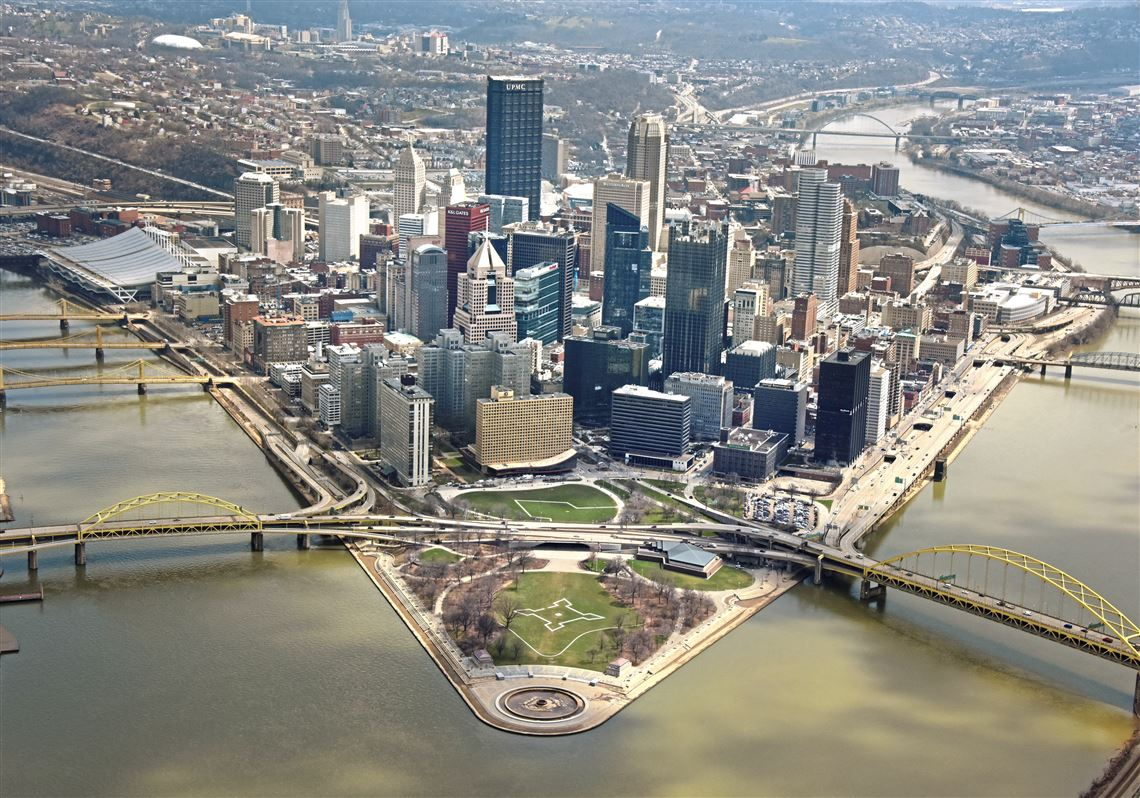
__Three major rivers flow through Pittsburgh, Pennsylvania: the Allegheny River, the Monongahela River, and the Ohio River.__

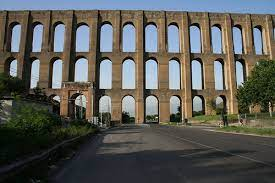
<br>
__An aqueduct is a type of bridge specifically designed to carry water over a gap, such as a river or a valley, while maintaining a steady flow. It is a structure that serves as a water conduit, enabling the transportation of water from one location to another. Aqueducts have been used since ancient times to supply water for irrigation, drinking, and various other purposes.__

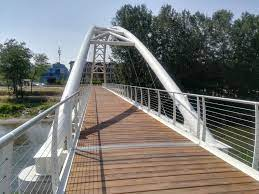
<br>
__Walk bridge describes a bridge that is primarily designed for pedestrian use. Walk bridges are intended for people to cross over obstacles such as rivers, highways, railways, or any other gap that needs to be traversed on foot.__

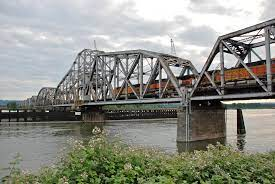
<br>
__A railroad bridge, also known as a railway bridge, is a type of bridge specifically designed to carry railway tracks and support the weight of trains. These bridges are essential components of railway infrastructure, allowing trains to cross over obstacles such as rivers, valleys, canyons, or other transportation routes.__

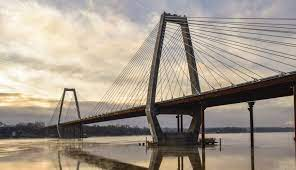
<br>
__A highway bridge, also known as a road bridge or vehicular bridge, is a type of bridge designed to carry road traffic, including automobiles, trucks, buses, and motorcycles, over an obstacle such as a river, valley, or another transportation route. Highway bridges are essential components of transportation infrastructure, allowing vehicles to cross over impassable areas and connect road networks.__

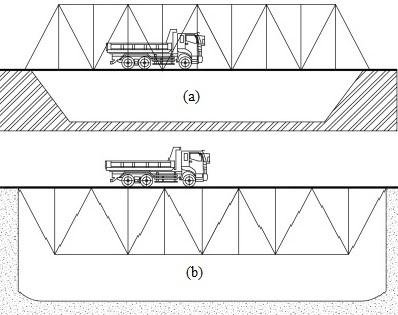
<br>
_a is a **through** type_

_b is a **duct** type_

<a href="https://archive.ics.uci.edu/ml/datasets/Pittsburgh+Bridges">Dataset Reference Link</a>

<a href="https://www.kaggle.com/code/heitornunes/predicting-5-design-properties-cart"> Kaggle Reference Link </a>

In [33]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../data/raw/bridges.csv', header=None, 
                 names=['identifier', 'river', 'location', 'erected_year','purpose','length','lanes',
                       'clear-g', 't-or-d', 'material', 'span', 'rel', 'type'])
df

,identifier,river,location,erected_year,purpose,length,lanes,clear-g,t-or-d,material,span,rel,type
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,E84,A,24,1969,HIGHWAY,870,6,G,THROUGH,STEEL,MEDIUM,F,ARCH
104,E91,O,44,1975,HIGHWAY,3756,6,G,THROUGH,STEEL,LONG,F,ARCH
105,E90,M,7,1978,HIGHWAY,950,6,G,THROUGH,STEEL,LONG,F,ARCH
106,E100,O,43,1982,HIGHWAY,?,?,G,?,?,?,F,?


In [35]:
df['type'].value_counts()

type
SIMPLE-T    44
WOOD        16
ARCH        13
SUSPEN      11
CANTILEV    11
CONT-T      10
?            2
NIL          1
Name: count, dtype: int64

In [36]:
df.columns

Index(['identifier', 'river', 'location', 'erected_year', 'purpose', 'length',
       'lanes', 'clear-g', 't-or-d', 'material', 'span', 'rel', 'type'],
      dtype='object')

In [37]:
df.isna().sum()

identifier      0
river           0
location        0
erected_year    0
purpose         0
length          0
lanes           0
clear-g         0
t-or-d          0
material        0
span            0
rel             0
type            0
dtype: int64

In [38]:
df[df == "?"].count()

identifier       0
river            0
location         1
erected_year     0
purpose          0
length          27
lanes           16
clear-g          2
t-or-d           6
material         2
span            16
rel              5
type             2
dtype: int64

In [39]:
for col in df.columns:
    df[col] = df[col].replace("?", np.nan)

In [40]:
df.isna().sum()

identifier       0
river            0
location         1
erected_year     0
purpose          0
length          27
lanes           16
clear-g          2
t-or-d           6
material         2
span            16
rel              5
type             2
dtype: int64

In [41]:
df = df.ffill()

In [42]:
df.isna().sum()

identifier      0
river           0
location        0
erected_year    0
purpose         0
length          1
lanes           0
clear-g         0
t-or-d          0
material        0
span            0
rel             0
type            0
dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [45]:
for col in df.columns[:-1]:
    if df[col].dtype == object:
        df[col] = lb.fit_transform(df[col])
    else:
        df[col] = lb.fit_transform(df[col])

In [47]:
df.to_csv("../data/processed/processed_data.csv", index=False)